In [1]:
import numpy as np
from astropy.io import fits
import healpy as hp
import pandas as pd
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import pickle


### Retrieving the relevant CCD Data

In [2]:
decamCCD = fits.open('../bricks_data/ccds-annotated-decam-dr9.fits')
#mosaicCCD = fits.open('../bricks_data/ccds-annotated-mosaic-dr9.fits')
#bassCCD = fits.open('../bricks_data/ccds-annotated-90prime-dr9.fits')
print(decamCCD[1].columns)


ColDefs(
    name = 'image_filename'; format = '120A'
    name = 'image_hdu'; format = 'I'
    name = 'camera'; format = '5A'
    name = 'expnum'; format = 'K'
    name = 'plver'; format = '8A'
    name = 'procdate'; format = '19A'
    name = 'plprocid'; format = '7A'
    name = 'ccdname'; format = '3A'
    name = 'object'; format = '35A'
    name = 'propid'; format = '10A'
    name = 'filter'; format = '1A'
    name = 'exptime'; format = 'E'
    name = 'mjd_obs'; format = 'D'
    name = 'airmass'; format = 'E'
    name = 'fwhm'; format = 'E'
    name = 'width'; format = 'I'
    name = 'height'; format = 'I'
    name = 'ra_bore'; format = 'D'
    name = 'dec_bore'; format = 'D'
    name = 'crpix1'; format = 'E'
    name = 'crpix2'; format = 'E'
    name = 'crval1'; format = 'D'
    name = 'crval2'; format = 'D'
    name = 'cd1_1'; format = 'E'
    name = 'cd1_2'; format = 'E'
    name = 'cd2_1'; format = 'E'
    name = 'cd2_2'; format = 'E'
    name = 'yshift'; format = 'L'
    name = 

In [3]:
dataDecam = decamCCD[1].data
#dataMosaic = mosaicCCD[1].data
#dataBass = bassCCD[1].data

In [4]:
ra0 = dataDecam.field('ra0')
dec0 = dataDecam.field('dec0')
ra1 = dataDecam.field('ra1')
dec1 = dataDecam.field('dec1')
ra2 = dataDecam.field('ra2')
dec2 = dataDecam.field('dec2')
ra3 = dataDecam.field('ra3')
dec3 = dataDecam.field('dec3')
#Extracting First systematic
filter = dataDecam.field('filter')

airmass = dataDecam.field('airmass')

In [5]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample.csv')

ra = df["RA"].to_numpy(copy=True)
dec = df["DEC"].to_numpy(copy=True)

raDec = np.stack((ra,dec), axis=1)

print(raDec.shape)

def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

NSIDE = 256
NPIX = hp.nside2npix(NSIDE)


(379416, 2)


### Now, trying to actually get all ccds per pixel
Begin by loading the Dictionary mapping pixels to CCDs. Afterwards, iterating through the ccds for a given pixel.
Depending on the systematics, we have to break systematics down into the different bands.
Airmass is simply averaged across all CCDs, exposure times are calculated on a per CCD basis.


In [6]:
with open('../bricks_data/brickpixel2ccd_256.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

Number of CCDs in the given pixel:  57


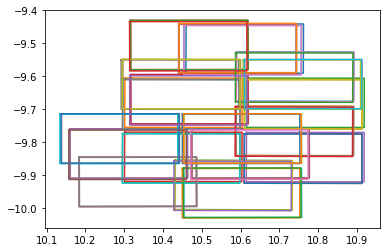

In [21]:
sample_pixel = 459294

# Plot what a given pixel looks like in terms of CCDs

ccds_per_pixel = pixel2ccd_dict[sample_pixel]

print("Number of CCDs in the given pixel: ", len(ccds_per_pixel))
for ccd in ccds_per_pixel:
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
        xs = [ra0[ccd],ra1[ccd], ra2[ccd], ra3[ccd],ra0[ccd] ]
        ys = [dec0[ccd],dec1[ccd], dec2[ccd], dec3[ccd],dec0[ccd]]
        plt.plot(xs,ys)


#### Classifying whether a given galaxy is inside one of the CCDs in a pixel

In [22]:
# Identifying which CCD features a given Galaxy
# Looping through CCDs



ccds_per_pixel = pixel2ccd_dict[sample_pixel]

# getting a subset of only those galaxies that are within a given pixel:

theta, phi = raDec2thetaPhi(ra, dec)
pixel_indices = hp.ang2pix(NSIDE, theta,phi)

galaxies_in_sample_pixel = (pixel_indices == sample_pixel)
ra_sample_pixel = ra[galaxies_in_sample_pixel]
dec_sample_pixel = dec[galaxies_in_sample_pixel]
raDec_sample_pixel = np.stack((ra_sample_pixel,dec_sample_pixel), axis=1)

print(len(ra_sample_pixel))
print(len(dec_sample_pixel))

453
453


Number of CCDs per pixel: 57
Number of Objects per pixel: 453


<ipython-input-23-5c1809221d22>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pixel_boundary = hp.boundaries(nside=NSIDE, pix=sample_pixel, step=1)
<ipython-input-23-5c1809221d22>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#dep

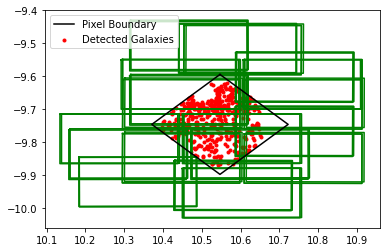

In [23]:
print("Number of CCDs per pixel:", len(ccds_per_pixel))
print("Number of Objects per pixel:", len(ra_sample_pixel))
'''
for ccd in ccds_per_pixel:
    #coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
        xs = [ra0[ccd],ra1[ccd], ra2[ccd], ra3[ccd],ra0[ccd] ]
        ys = [dec0[ccd],dec1[ccd], dec2[ccd], dec3[ccd],dec0[ccd]]
        plt.plot(xs,ys, c='green', label="CCD Boundaries")
'''
xs = [ra0[ccds_per_pixel],ra1[ccds_per_pixel], ra2[ccds_per_pixel], ra3[ccds_per_pixel],ra0[ccds_per_pixel] ]
ys = [dec0[ccds_per_pixel],dec1[ccds_per_pixel], dec2[ccds_per_pixel], dec3[ccds_per_pixel],dec0[ccds_per_pixel]]
plt.plot(xs,ys, c='green')

pixel_boundary = hp.boundaries(nside=NSIDE, pix=sample_pixel, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(),lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0],pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1],pixel_boundary_raDec[1][0])


plt.plot(pixel_boundary_raDec[0],pixel_boundary_raDec[1], c='black', label="Pixel Boundary")


plt.scatter(ra_sample_pixel, dec_sample_pixel, c='red', marker='.', label="Detected Galaxies")

plt.legend()
plt.show()
# Note: The cluster in the middle is the result that there are limited bricks used so far: 453 objects only in this pixel

In [14]:

airmass_value_aggr = 0.0
objects_per_pixel = len(raDec_sample_pixel)

#Loop through all objects/galaxies in the pixel:
for galaxy in range(objects_per_pixel):
    airmass_galaxy = 0.0
    ccd_per_galaxy = 0
# For all CCDs in a pixel, we check whether the given galaxy is in them
    for no in ccds_per_pixel:
        #for no in ccds_per_pixel:
        x0 = ra0[no]
        x1 = ra1[no]
        x2 = ra2[no]
        x3 = ra3[no]

        y0 = dec0[no]
        y1 = dec1[no]
        y2 = dec2[no]
        y3 = dec3[no]

        #Define a Bounding Box Polygon using the coorners of a CCD
        boundingBoxPath = mplPath.Path(np.array([[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]))

        #If the object is in the pixel, add the airmass for this ccd to the pixel value
        #Some of these are zero since there are not yet complete galaxy surveys
        if boundingBoxPath.contains_point(raDec_sample_pixel[galaxy]):
            airmass_galaxy += airmass[no]
            ccd_per_galaxy += 1

    # Add the average airmass for this galaxy to the airmass for the pixel
    airmass_value_aggr += airmass_galaxy/ccd_per_galaxy
    #print(airmass_value_aggr)

# Get the mean airmass across all objects in the pixel
airmass_pixel = airmass_value_aggr/objects_per_pixel
print("Airmass in pixel", sample_pixel, ":", airmass_pixel)

Airmass in pixel 459294 : 1.3215194514984103


### Looping through the entire catalogue 

In [15]:
pixels = pixel2ccd_dict.keys()

print(len(pixels))

361367


In [19]:

for i,sample_pixel in enumerate(pixels):
    ccds_per_pixel = pixel2ccd_dict[sample_pixel]

    # getting a subset of only those galaxies that are within a given pixel:

    theta, phi = raDec2thetaPhi(ra, dec)
    pixel_indices = hp.ang2pix(NSIDE, theta,phi)

    galaxies_in_sample_pixel = (pixel_indices == sample_pixel)
    ra_sample_pixel = ra[galaxies_in_sample_pixel]
    dec_sample_pixel = dec[galaxies_in_sample_pixel]
    raDec_sample_pixel = np.stack((ra_sample_pixel,dec_sample_pixel), axis=1)


    airmass_value_aggr = 0.0
    objects_per_pixel = len(raDec_sample_pixel)
    if objects_per_pixel == 0:
        continue

    #Loop through all objects/galaxies in the pixel:
    for galaxy in range(objects_per_pixel):
        airmass_galaxy = 0.0
        ccd_per_galaxy = 0
    # For all CCDs in a pixel, we check whether the given galaxy is in them
        for no in ccds_per_pixel:
            #for no in ccds_per_pixel:
            x0 = ra0[no]
            x1 = ra1[no]
            x2 = ra2[no]
            x3 = ra3[no]

            y0 = dec0[no]
            y1 = dec1[no]
            y2 = dec2[no]
            y3 = dec3[no]

            #Define a Bounding Box Polygon using the coorners of a CCD
            boundingBoxPath = mplPath.Path(np.array([[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]))

            #If the object is in the pixel, add the airmass for this ccd to the pixel value
            #Some of these are zero since there are not yet complete galaxy surveys
            if boundingBoxPath.contains_point(raDec_sample_pixel[galaxy]):
                airmass_galaxy += airmass[no]
                ccd_per_galaxy += 1

        # Add the average airmass for this galaxy to the airmass for the pixel
        if ccd_per_galaxy > 0:
            airmass_value_aggr += airmass_galaxy/ccd_per_galaxy
        #print(airmass_value_aggr)

    # Get the mean airmass across all objects in the pixel
    if objects_per_pixel > 0:
        airmass_pixel = airmass_value_aggr/objects_per_pixel
    #if i % 20000 == 0:
    print("Airmass in pixel", sample_pixel, ":", airmass_pixel)


Airmass in pixel 729635 : 1.1904262590955943
Airmass in pixel 740502 : 1.2041006095339104
Airmass in pixel 741107 : 1.2042057927093313
Airmass in pixel 661899 : 1.0616512952386437
Airmass in pixel 662895 : 1.0691052406546853
Airmass in pixel 661898 : 1.0702320151256859
Airmass in pixel 662894 : 1.0815127400435534
Airmass in pixel 663887 : 1.0782063338838628
Airmass in pixel 661916 : 1.0998183699841058
Airmass in pixel 661917 : 1.1032103407981382
Airmass in pixel 662912 : 1.1013340504542215
Airmass in pixel 662913 : 1.1087567623779144
Airmass in pixel 663905 : 1.104668977582568
Airmass in pixel 647690 : 1.1891559342327362
Airmass in pixel 651767 : 1.1120917598141244
Airmass in pixel 651768 : 1.1084489360372856
Airmass in pixel 652792 : 1.1070771760039884
Airmass in pixel 653815 : 1.1110829984854553
Airmass in pixel 653816 : 1.1029424394494123
Airmass in pixel 720641 : 1.297142859016146
Airmass in pixel 721364 : 1.2979106844694164
Airmass in pixel 721365 : 1.2968300902502545
Airmass in p

Airmass in pixel 636516 : 1.2208679994221114
Airmass in pixel 636517 : 1.2181378455909375
Airmass in pixel 637541 : 1.229958946105649
Airmass in pixel 645738 : 1.247246067189723
Airmass in pixel 649847 : 1.2565727460529856
Airmass in pixel 645737 : 1.2329773407011553
Airmass in pixel 646761 : 1.243886118834002
Airmass in pixel 647785 : 1.2437442891880377
Airmass in pixel 647786 : 1.2359200264447583
Airmass in pixel 594563 : 1.2726594913574474
Airmass in pixel 593537 : 1.2610234921620778
Airmass in pixel 594562 : 1.2570408245340792
Airmass in pixel 595586 : 1.2695964451469797
Airmass in pixel 594561 : 1.2672222177494534
Airmass in pixel 596610 : 1.2669360632049955
Airmass in pixel 596611 : 1.2573093838409295
Airmass in pixel 589436 : 1.2428049163968191
Airmass in pixel 590460 : 1.2488895607415824
Airmass in pixel 590461 : 1.2421280234964878
Airmass in pixel 591484 : 1.2493499736038043
Airmass in pixel 592513 : 1.2461839325998183
Airmass in pixel 593536 : 1.263377792325958
Airmass in pix

Airmass in pixel 608819 : 1.142570552332797
Airmass in pixel 609842 : 1.1524860832785941
Airmass in pixel 658970 : 1.1708808024328552
Airmass in pixel 659978 : 1.164816881841334
Airmass in pixel 648763 : 1.2550063453787665
Airmass in pixel 647740 : 1.2571780532744123
Airmass in pixel 648764 : 1.2500507610786473
Airmass in pixel 647741 : 1.256195421625646
Airmass in pixel 643547 : 1.0537564319130606
Airmass in pixel 642524 : 1.051999998092651
Airmass in pixel 643548 : 1.0528888874583773
Airmass in pixel 644571 : 1.0605702448604455
Airmass in pixel 644572 : 1.0495071396657412
Airmass in pixel 654815 : 1.0530363867754045
Airmass in pixel 650845 : 1.232610525582966
Airmass in pixel 665984 : 1.2496490512367708
Airmass in pixel 666963 : 1.2244504254276798
Airmass in pixel 667939 : 1.2136893375782882
Airmass in pixel 667940 : 1.2224999964237213
Airmass in pixel 743551 : 1.2659315573203178
Airmass in pixel 744134 : 1.2671433190913035
Airmass in pixel 744135 : 1.2701262032732583
Airmass in pixe

Airmass in pixel 686661 : 1.2329495874815626
Airmass in pixel 687552 : 1.2311275877008907
Airmass in pixel 687553 : 1.2408275459676275
Airmass in pixel 666050 : 1.2707063864369252
Airmass in pixel 667029 : 1.2603770823356297
Airmass in pixel 667030 : 1.2575162387275063
Airmass in pixel 668005 : 1.2527737715279823
Airmass in pixel 703497 : 1.102268607298355
Airmass in pixel 703498 : 1.1025266793574326
Airmass in pixel 704310 : 1.1015615752867243
Airmass in pixel 705118 : 1.1004255666357334
Airmass in pixel 705119 : 1.1021163891965204
Airmass in pixel 657783 : 1.082757142559071
Airmass in pixel 658796 : 1.087181243308567
Airmass in pixel 645514 : 1.0565488515693646
Airmass in pixel 645515 : 1.0411969509864014
Airmass in pixel 646538 : 1.061309507336031
Airmass in pixel 646539 : 1.0540368686646948
Airmass in pixel 647562 : 1.0624511175316396
Airmass in pixel 741654 : 1.2129596294319824
Airmass in pixel 742250 : 1.21450248470923
Airmass in pixel 742251 : 1.214152277872767
Airmass in pixel 

Airmass in pixel 626187 : 1.1089937217619565
Airmass in pixel 627211 : 1.1187654859635447
Airmass in pixel 628235 : 1.1262857062476022
Airmass in pixel 631308 : 1.145113741318575
Airmass in pixel 632332 : 1.1336880601881931
Airmass in pixel 730341 : 1.2582182032883444
Airmass in pixel 722015 : 1.2531604663307971
Airmass in pixel 722731 : 1.2441386775445777
Airmass in pixel 722734 : 1.2454838752746582
Airmass in pixel 722735 : 1.2620328915556076
Airmass in pixel 722014 : 1.2140004513040048
Airmass in pixel 722730 : 1.2278779582367725
Airmass in pixel 723442 : 1.2318399593232507
Airmass in pixel 723446 : 1.2507802489733568
Airmass in pixel 723447 : 1.2573107741166225
Airmass in pixel 724154 : 1.2461326662693832
Airmass in pixel 747565 : 1.3110580428033474
Airmass in pixel 748121 : 1.3117013578314174
Airmass in pixel 748672 : 1.3160000170652681
Airmass in pixel 748673 : 1.3040000182610971
Airmass in pixel 750714 : 1.2425760802807784
Airmass in pixel 751246 : 1.2415780675705734
Airmass in 

Airmass in pixel 717703 : 1.3078913726910442
Airmass in pixel 718442 : 1.307492353073919
Airmass in pixel 718443 : 1.314289965180261
Airmass in pixel 650871 : 1.2713194071442384
Airmass in pixel 649848 : 1.292561421577757
Airmass in pixel 650872 : 1.2931663926852393
Airmass in pixel 651896 : 1.294095768117589
Airmass in pixel 637556 : 1.2605442196362062
Airmass in pixel 638579 : 1.239408304630037
Airmass in pixel 638580 : 1.241240430573214
Airmass in pixel 639604 : 1.246022336362162
Airmass in pixel 700343 : 1.165180467775815
Airmass in pixel 642703 : 1.266455175794404
Airmass in pixel 643727 : 1.2491765663891032
Airmass in pixel 641713 : 1.2659513197787997
Airmass in pixel 642736 : 1.2644867784493123
Airmass in pixel 642737 : 1.2659955841372752
Airmass in pixel 643761 : 1.2587833763064593
Airmass in pixel 699685 : 1.20411434555683
Airmass in pixel 701337 : 1.2304143477419054
Airmass in pixel 614026 : 1.2996087669587997
Airmass in pixel 618130 : 1.282535864156944
Airmass in pixel 62529

Airmass in pixel 636680 : 1.1960851058902222
Airmass in pixel 637704 : 1.2031874369718607
Airmass in pixel 587488 : 1.218477218153355
Airmass in pixel 588512 : 1.2141925876447124
Airmass in pixel 588513 : 1.2146490249784836
Airmass in pixel 589536 : 1.2101026935563304
Airmass in pixel 591613 : 1.1564381404664603
Airmass in pixel 592638 : 1.1797423758487469
Airmass in pixel 589566 : 1.1723300032267976
Airmass in pixel 590590 : 1.158364672914711
Airmass in pixel 590591 : 1.175353422753618
Airmass in pixel 591614 : 1.1718471005102102
Airmass in pixel 603910 : 1.1653806869385197
Airmass in pixel 604934 : 1.131333365356713
Airmass in pixel 604935 : 1.1741666942834854
Airmass in pixel 605958 : 1.1333333651224773
Airmass in pixel 750723 : 1.2586682580541495
Airmass in pixel 751255 : 1.262279832956014
Airmass in pixel 751784 : 1.2637915633773618
Airmass in pixel 492128 : 1.191230406184261
Airmass in pixel 494176 : 1.2049670602650198
Airmass in pixel 346249 : 1.4336252333648636
Airmass in pixel

KeyboardInterrupt: 